# MNIST Digit Classifier — Model Training & Backend Integration

This notebook trains a CNN model on the MNIST dataset for digit classification.  
The trained model is later used in a Flask backend that powers a web application.

#project by Aarav Singla


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np


We begin by importing TensorFlow and required components from Keras.  
We also load the MNIST dataset, which contains 70,000 28×28 grayscale images of handwritten digits (0–9).


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


We normalize pixel values to the [0, 1] range and reshape the data to fit CNN input requirements.
Labels are one-hot encoded to be compatible with `categorical_crossentropy` loss.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We use a basic CNN with:
- One convolutional + max-pooling layer
- A dense hidden layer
- A softmax output layer with 10 units (for digits 0–9)

This architecture balances simplicity and high accuracy on MNIST.


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9154 - loss: 0.2879 - val_accuracy: 0.9781 - val_loss: 0.0649
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9853 - val_loss: 0.0453
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9907 - loss: 0.0297 - val_accuracy: 0.9835 - val_loss: 0.0558
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 0.9865 - val_loss: 0.0430
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 22ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.9841 - val_loss: 0.0531


We use the Adam optimizer and categorical cross-entropy loss.
The model is trained for 5 epochs with validation on the test set.


In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9806 - loss: 0.0637
Test Accuracy: 0.9841


We evaluate the trained model's performance on unseen test data.
Typical accuracy for this architecture on MNIST is ~98%.


In [6]:
model.save("model.h5")


The trained model is saved in `.h5` format, which is later loaded in the Flask backend for real-time predictions.


### ✅ Model Summary

- Dataset: MNIST (28×28 grayscale images of handwritten digits)
- Model: CNN with 1 Conv2D layer + Dense layers
- Activation: ReLU and softmax
- Loss Function: Categorical Crossentropy
- Optimizer: Adam
- Accuracy: ~98% on test data
- Export Format: `.h5` (Keras HDF5 model)


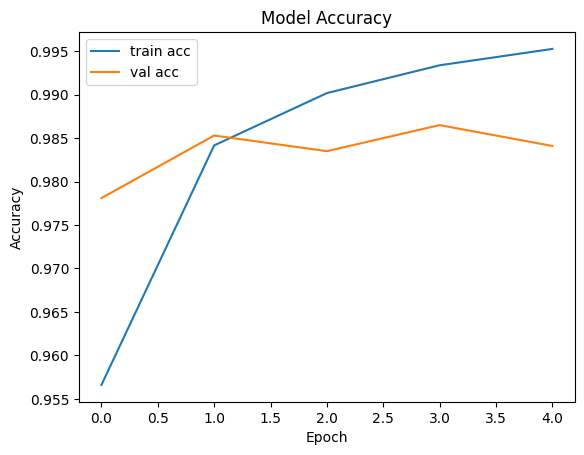

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 🔌 Flask Backend Integration

The saved model is used in a Flask server which exposes a `/predict` endpoint.  
This endpoint:
- Accepts uploaded images via POST requests
- Preprocesses and resizes the image
- Loads the saved `model.h5`
- Returns prediction and confidence in JSON

This backend powers the React UI in the web app.
